the project uses the student performance dataset which have dependent variable as hours and independent variable as their respective scores.the model is trained using the simple linear regression algorithm to predict the scores of student for unknown hours input.the model is created using the machine learning libraries like scikit learn(sklearn),numpy,pandas and matplotlib.

Imoprting required libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the required dataset 

In [20]:
dataset=pd.read_csv('D:\dataset\student_scores.csv')
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


creating visualization of dataset for initial analysis

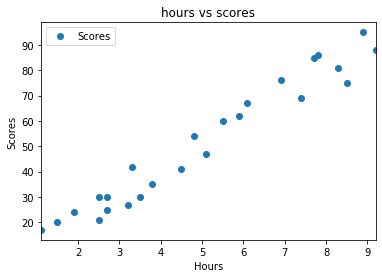

In [21]:
dataset.plot(x='Hours',y='Scores',style='o')
#plt.show() dont called this show function before title and label method
plt.title('hours vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show() #if we dont called this method then also plot is displayed

extractig the dependent(y) and independent(X) dataset 

In [22]:
#X=dataset.iloc[:, 0].values.reshape(-1,1)#always reshape your independent variable or use slicing as [:,:-1] instead of iloc you can also use loc method
#y=dataset.iloc[:,1].values
X=dataset['Hours'].values.reshape(-1,1)
y=dataset['Scores'].values
#print(X)
#print(y)

Spliting the dataset into train and test dataset using train_test_spilt function from scikit(also called as sklearn) library 

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

As our dataset shows linear relationship between dependent and independent so will using linear regression.as here only one dependent variable and independent variable will using simple linear regression   

In [24]:
from sklearn.linear_model import LinearRegression
Regressor=LinearRegression()
Regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

using the Regressor model which is train using fit function is used to find interfect and coefficient of the linear regression line 

In [25]:
intercept=Regressor.intercept_
print('intercept=', +intercept)

coefficient=Regressor.coef_
print('coefficient=' , +coefficient)


intercept= 2.0181600414346974
coefficient= [9.91065648]


using the test dataset to predict the output

In [26]:
y_pred=Regressor.predict(X_test)#for test dataset
Y_pred=Regressor.predict(X)#for whole dataset

comparing the actual and predicted values of dependent variable

In [27]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


finding the performance of model using the metrics function of sklearn

In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


visualizing the linear regression line using the plot function of matplotlib libraries

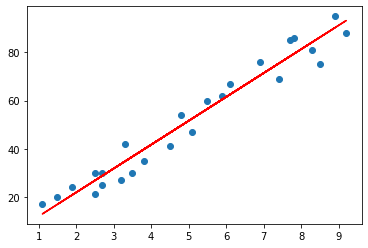

In [29]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

finding the score of the model using R-square function of sklearn,the model gives score around 94.54% which is good

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105355

using the train model can predict the values(output) for unknown independent variables.the trained model predicts if the student study for 5,6 and 3.5 hours student's score will be 51.57 ,61.48 and 36.70 respectively 

In [31]:
Regressor.predict([[5.0],[6.0],[3.5]])#predicting values for unknown independent variables

array([51.57144244, 61.48209893, 36.70545772])